# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/University/CS232.M22.KHCL/FinalProject

/content/drive/MyDrive/University/CS232.M22.KHCL/FinalProject


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from scipy.io import wavfile
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
data_url = "https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2"
data_path = keras.utils.get_file("LJSpeech-1.1", data_url, untar=True)
wavs_path = data_path + "/wavs/"
metadata_path = data_path + "/metadata.csv"

2748588032/2748572632 [==============================] - 68s 0us/step


In [4]:
data_path

'/root/.keras/datasets/LJSpeech-1.1'

In [3]:
# Read metadata file and parse it
metadata_df = pd.read_csv(metadata_path, sep="|", header=None, quoting=3)
metadata_df.columns = ["file_name", "transcription", "normalized_transcription"]
metadata_df = metadata_df[["file_name", "normalized_transcription"]]
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)
metadata_df.head(3)

,file_name,normalized_transcription
0,LJ047-0066,a Communist Party publication.
1,LJ002-0328,"Failing any of these methods, seeing that stra..."
2,LJ037-0255,testified that Commission Exhibit Number one s...


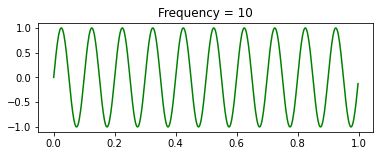

In [5]:
import numpy as np
from matplotlib import pyplot as plt

# example of sampling rate
sampling_rate = 500  
time = 1  # in seconds
frequency = 10 # in herzt
amplitude = 1

x = np.linspace(0, time, sampling_rate * time, endpoint=False)
frequencies = x * frequency
# 2pi because np.sin takes radians
y = amplitude * np.sin((2 * np.pi) * frequencies)

plt.figure(figsize=(6, 2))
plt.title(f"Frequency = {frequency}")
plt.plot(x, y, color='green')
plt.show()

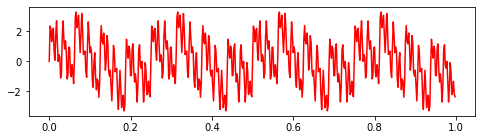

In [6]:
# example of sampling rate
sampling_rate = 500  
amplitude = 1
time = 1  # in seconds
frequency_1 = 4 # in herzt
frequency_2 = 16 # in herzt
frequency_3 = 32 
frequency_4 = 64
frequency_5 = 128

x = np.linspace(0, time, sampling_rate * time, endpoint=False)
frequencies_1 = x * frequency_1
frequencies_2 = x * frequency_2
frequencies_3 = x * frequency_3
frequencies_4 = x * frequency_4
frequencies_5 = x * frequency_5
# 2pi because np.sin takes radians
y_1 = amplitude * np.sin((2 * np.pi) * frequencies_1)
y_2 = amplitude * np.sin((2 * np.pi) * frequencies_2)
y_3 = amplitude * np.sin((2 * np.pi) * frequencies_3)
y_4 = amplitude * np.sin((2 * np.pi) * frequencies_4)
y_5 = amplitude * np.sin((2 * np.pi) * frequencies_5)
y = y_1 + y_2 + y_3 + y_4 + y_5
plt.figure(figsize=(8, 2))
#plt.title(f"Combination of signals with frequency = {frequency_1} and frequency = {frequency_2}")
plt.plot(x, y, color='red')
plt.show()

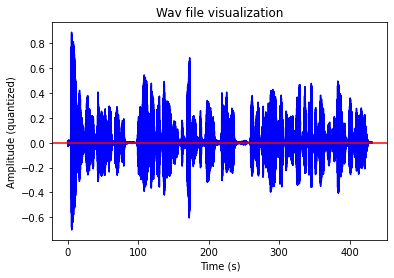

In [7]:
import librosa

wav_filepath = os.path.join(wavs_path, metadata_df.iloc[1]["file_name"] + ".wav")
audio, sr = librosa.load(wav_filepath)

time = np.linspace(0, audio.shape[0] / sampling_rate, num=audio.shape[0]) 
plt.plot(time, audio, color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (quantized)")
plt.title("Wav file visualization")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

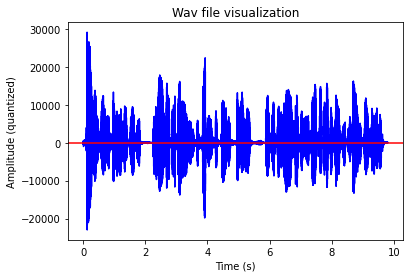

In [8]:
import os
import numpy 

from scipy.io import wavfile

wav_filepath = os.path.join(wavs_path, metadata_df.iloc[1]["file_name"] + ".wav")
sampling_rate, data = wavfile.read(wav_filepath) 

time = np.linspace(0, data.shape[0] / sampling_rate, num=data.shape[0]) 

plt.plot(time, data, color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (quantized)")
plt.title("Wav file visualization")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [9]:
print("Sampling rate: ", sampling_rate) # this sampling rate is taken from the header of wav file
print("Time of the audio: ", data.shape[0] / sampling_rate)

Sampling rate:  22050
Time of the audio:  9.794331065759637


In [10]:
print("Audio shape: ", data.shape)

Audio shape:  (215965,)


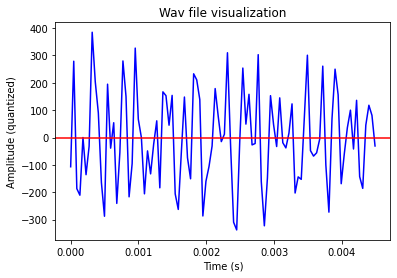

In [11]:
plt.plot(time[:100], data[:100], color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (quantized)")
plt.title("Wav file visualization")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [12]:
n_data_points = data.shape[0]
window_size = 40 * (10 ** -3) # define each window's size
offset = 10 * (10 ** -3) # define the distance in time of each window
window_length = int(round(window_size * sampling_rate)) # size = how many data points ?
window_step = int(round(offset * sampling_rate)) # offset in time = how many data points ?
n_windows = int(np.ceil(float(abs(n_data_points - window_length) / window_step))) # total number of windows 
print("window length: ", window_length)
print("window step: ", window_step)
print("number of windows: ", n_windows)

window length:  882
window step:  220
number of windows:  978


In [13]:
print(n_data_points)

215965


In [14]:
# take of residual part of the last window 
# nothing part will be equal to 0
pad_data_length = n_windows * window_step + window_length
z = np.zeros((pad_data_length - n_data_points))
pad_data = np.append(data, z)

In [15]:
print(data.shape)
print(pad_data.shape)

(215965,)
(216042,)


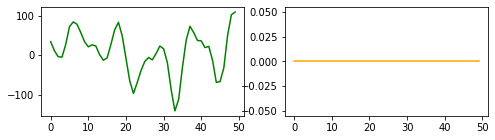

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(8, 2))
ax[0].plot(data[-50:], color="green")
ax[1].plot(pad_data[-50:], color="orange")
plt.show()

In [17]:
print(pad_data[-(pad_data.shape[0] - data.shape[0]):])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [18]:
sub_indice_1 = np.tile(np.arange(0, window_length), (n_windows, 1))
print(sub_indice_1)

[[  0   1   2 ... 879 880 881]
 [  0   1   2 ... 879 880 881]
 [  0   1   2 ... 879 880 881]
 ...
 [  0   1   2 ... 879 880 881]
 [  0   1   2 ... 879 880 881]
 [  0   1   2 ... 879 880 881]]


In [19]:
sub_indice_2 = np.tile(np.arange(0, n_windows * window_step, window_step), (window_length, 1)).T
print(sub_indice_2)

[[     0      0      0 ...      0      0      0]
 [   220    220    220 ...    220    220    220]
 [   440    440    440 ...    440    440    440]
 ...
 [214500 214500 214500 ... 214500 214500 214500]
 [214720 214720 214720 ... 214720 214720 214720]
 [214940 214940 214940 ... 214940 214940 214940]]


In [20]:
indices = sub_indice_1 + sub_indice_2
indices = indices.astype(np.int16)

In [21]:
print(indices.shape)

(978, 882)


In [22]:
windows = pad_data[indices]

In [23]:
print(windows.shape)

(978, 882)


In [24]:
# fix data discontinuty after windowing by transforming to special windows
hanning_windows = windows * np.hanning(window_length)
hamming_windows = windows * np.hamming(window_length)

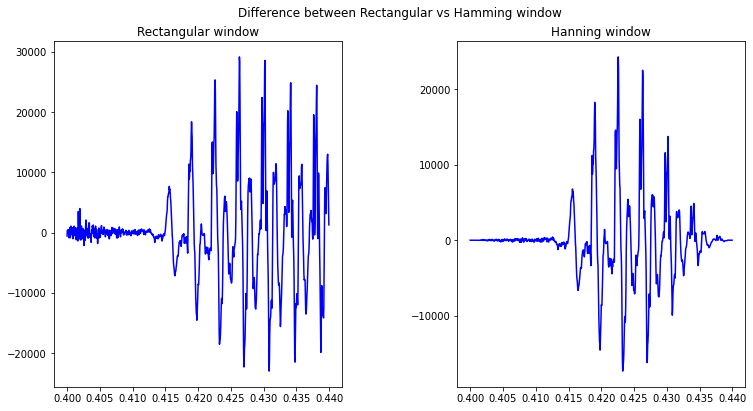

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Difference between Rectangular vs Hamming window')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.plot(time[window_length * 10:window_length * 10 + window_length], windows[10], color="blue")
ax1.title.set_text("Rectangular window")
ax2.plot(time[window_length * 10:window_length * 10 + window_length], hanning_windows[10], color="blue")
ax2.title.set_text("Hanning window")
plt.show()

In [26]:
NFFT = 512 # number of frequency bands
mag_frames = np.absolute(np.fft.rfft(hanning_windows, NFFT))  # Magnitude of the FFT
k = np.fft.rfftfreq(NFFT) # Discrete Fourier Transform sample frequencies
freq = k / sampling_rate

pow_frames = (mag_frames) ** 2 * 1.0 / NFFT # Power Spectrum
pow_frames = 10 * np.log10(pow_frames)  # change amplitude value to decibel (dB)

In [27]:
print("magnitude windows from fast fourier transform: ", pow_frames.shape)

magnitude windows from fast fourier transform:  (978, 257)


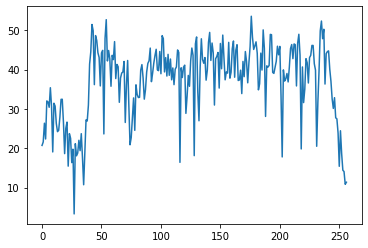

In [28]:
plt.plot(pow_frames[0])
plt.show()

In [29]:
test_data = tf.cast(data, dtype=np.float64)
frame_length = 256
frame_step = 160
fft_length = 384
stfts = tf.signal.stft(test_data, 
                       frame_length=frame_length,
                       frame_step=frame_step,
                       fft_length=fft_length)
stfts = tf.math.abs(stfts)

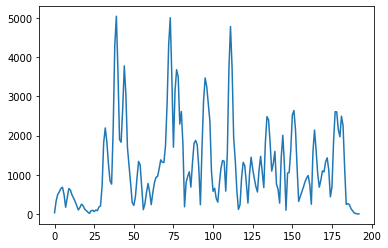

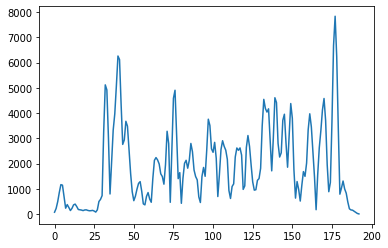

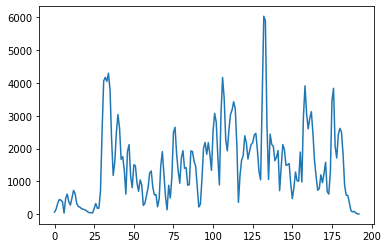

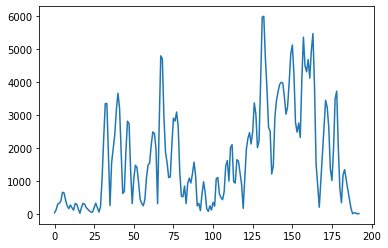

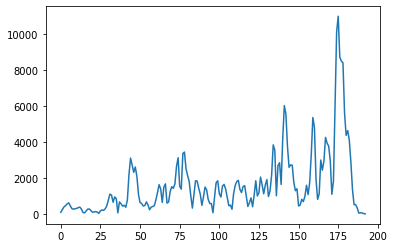

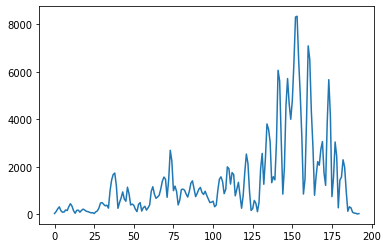

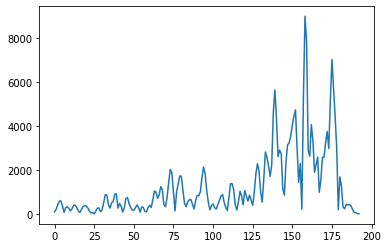

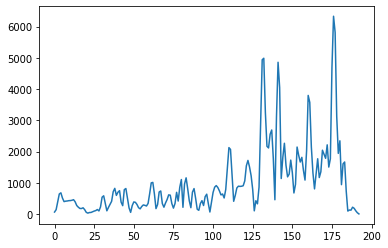

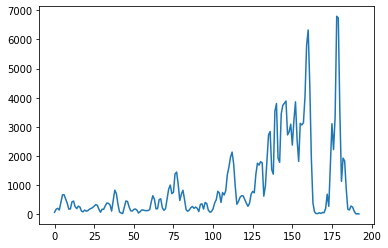

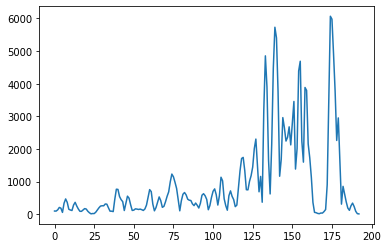

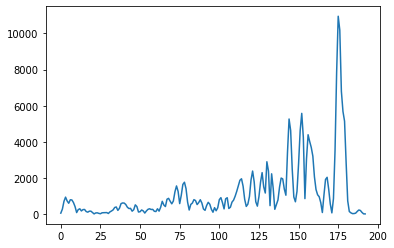

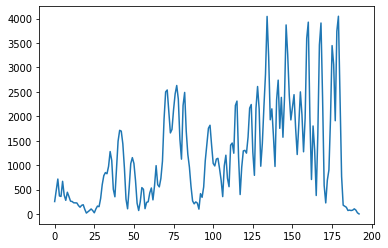

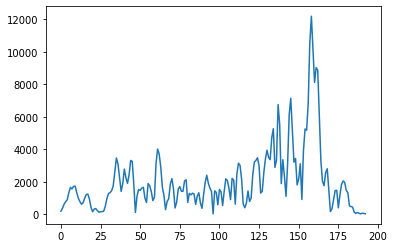

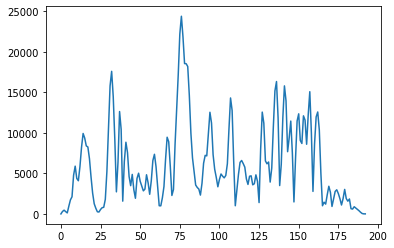

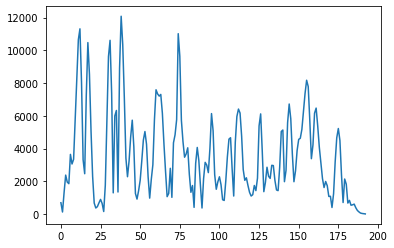

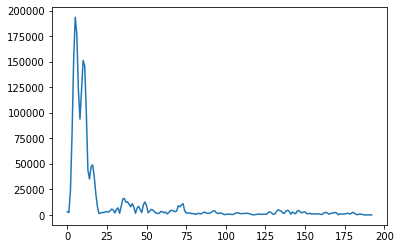

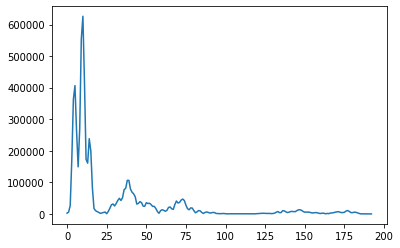

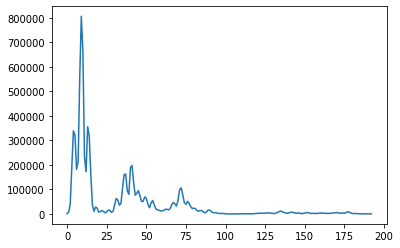

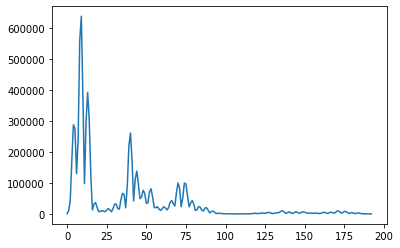

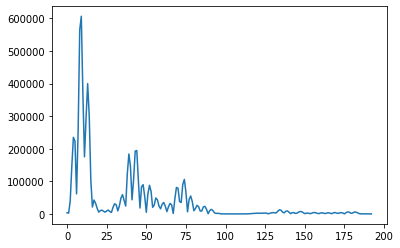

In [30]:

for i in range(20):
  sub_data = stfts[i]
  plt.plot(sub_data)
  plt.show()

In [31]:
n_filters = 40 # triangular filter
low_freq_mel = 0
# f = sampling_rate / 2 (nyquist theorem)
high_freq_mel = (1127 * np.log(1 + (sampling_rate / 2) / 700))  # Convert Hz to Mel
mel_points = np.linspace(low_freq_mel, high_freq_mel, n_filters + 2)  # Equally spaced in Mel scale
hz_points = (700 * (np.exp(mel_points / 1127) - 1))  # Convert Mel to Hz
bin = np.floor((NFFT + 1) * hz_points / sampling_rate)
fbank = np.zeros((n_filters, int(np.floor(NFFT / 2 + 1))))  
for m in range(1, n_filters + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

filter_banks = np.dot(pow_frames, fbank.T)
filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability

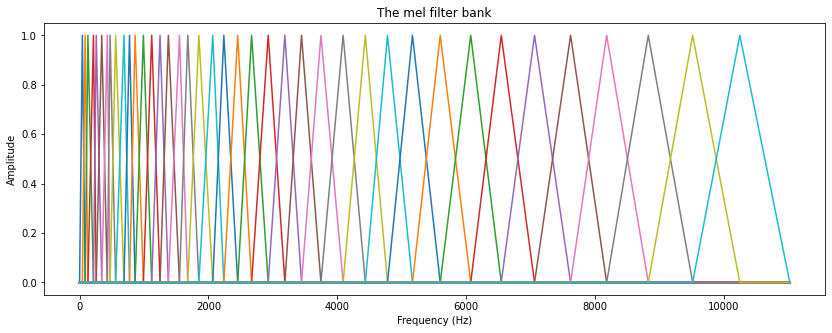

In [32]:
times = np.linspace(0, sampling_rate / 2, num=fbank.shape[1])
plt.figure(figsize=(14, 5))
plt.plot(times, fbank.T)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("The mel filter bank")
plt.show()

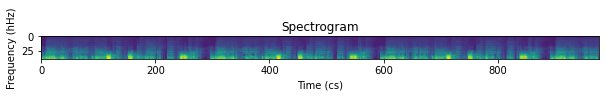

In [33]:
plt.figure(figsize=(10, 5))
spectrogram = filter_banks
mean = np.mean(spectrogram)
std = np.mean(spectrogram)
spectrogram = (spectrogram - mean) / std
spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
plt.imshow(spectrogram)
plt.xlabel("Time (cs)")
plt.ylabel("Frequency (hHz)")
plt.title("Spectrogram")
plt.show()

In [34]:
print(filter_banks.shape)

(978, 40)


In [35]:

(774, 40)
print(np.reshape(filter_banks, (-1, filter_banks.shape[0], 1)).shape)

(40, 978, 1)


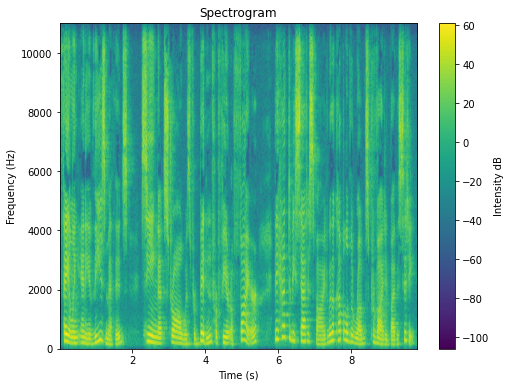

In [36]:
plt.figure(2, figsize=(8,6))
Pxx, freqs, bins, im = plt.specgram(pad_data, Fs=sampling_rate, NFFT=NFFT)
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title("Spectrogram")
cbar.set_label('Intensity dB')
plt.show()